In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import torch
from torch import nn

In [7]:
n_pos, n_neg = 2000, 2000

r_p = 5.0 + torch.normal(0.0, 1.0, size=[n_pos, 1])
theta_p = 2 * np.pi * torch.rand([n_pos, 1])
Xp = torch.cat([r_p * torch.cos(theta_p), r_p * torch.sin(theta_p)], axis = 1)
Yp = torch.ones_like(r_p)

r_n = 8.0 + torch.normal(0.0, 1.0, size=[n_neg, 1])
theta_n = 2 * np.pi * torch.rand([n_neg, 1])
Xn = torch.cat([r_n * torch.cos(theta_n), r_n * torch.sin(theta_n)], axis = 1)
Yn = torch.zeros_like(r_n)


X = torch.cat([Xp, Xn], 0)
Y = torch.cat([Yp, Yn], 0)


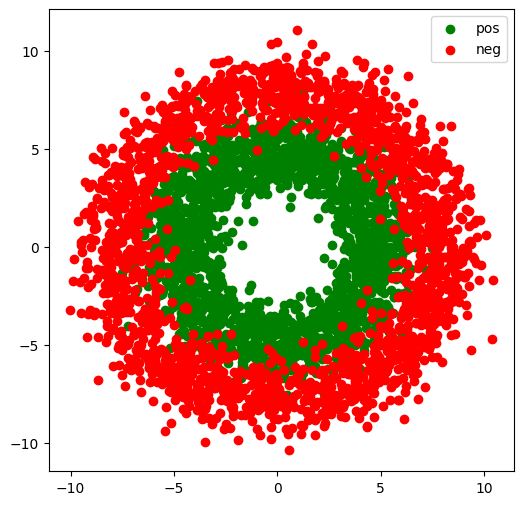

In [8]:
%matplotlib inline
plt.figure(figsize=(6,6))
plt.scatter(Xp[:,0].numpy(), Xp[:,1].numpy(), c = 'g')
plt.scatter(Xn[:,0].numpy(), Xn[:,1].numpy(), c = 'r')
plt.legend(["pos","neg"])


In [20]:
def data_iter(data, labels, batch_size=8):
    data_len = len(data)
    indices = list(range(data_len))
    np.random.shuffle(indices)
    for i in range(0, data_len, batch_size):
        indexs = torch.LongTensor(indices[i:min(i+batch_size, data_len)])
        # print(f"i: {i}")
        # print(f"indexs:{indexs}")
        yield data.index_select(0, indexs), labels.index_select(0, indexs)

In [22]:
data1 = torch.normal(0,1, [10,2])
labels = torch.zeros([10,1])

for data, label in data_iter(data1, labels,5):
    print(data)
    print(label)

i: 0
indexs:tensor([7, 2, 0, 5, 9])
tensor([[ 0.3600, -0.7363],
        [ 1.0644, -0.8246],
        [ 0.1757,  1.4090],
        [-0.0713, -0.8886],
        [ 0.3726, -0.7104]])
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])
i: 5
indexs:tensor([4, 6, 8, 1, 3])
tensor([[ 1.0795, -1.2812],
        [-0.5601, -0.2684],
        [ 0.3769, -0.7419],
        [ 1.0130,  0.4076],
        [-0.0718, -2.0639]])
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])
